In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',100)

In [3]:
df = pd.read_csv("imputed_final_deleted.csv")

In [4]:
y= df['class']
X= df[df.columns[df.columns!='class']]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 5)

In [6]:
print(len(y_test[y_test.isin([1])]))
print(len(y_train[y_train.isin([1])]))

58
303


In [6]:
import numpy as np
from sklearn import pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer, precision_recall_curve, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
from sklearn.decomposition import PCA, TruncatedSVD
import random
import math
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
import time
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


seed = 5
np.random.seed(seed)

In [7]:
pipelines = {
    "rf": pipeline.make_pipeline(StandardScaler(), RandomForestClassifier(random_state=5, class_weight='balanced')),
}

In [9]:
rf_hyperparameters = {
    "randomforestclassifier__n_estimators": [100, 150, 200],
    "randomforestclassifier__max_features": ["auto", "sqrt", 0.2, 0.3],
    'randomforestclassifier__min_samples_leaf': [1, 2, 5, 10],
    "randomforestclassifier__max_depth": [5, 8, 15, 25],
    "randomforestclassifier__min_samples_split": [2, 5, 10, 15]
}

hyperparameters = {"rf": rf_hyperparameters}

In [10]:
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv= 10, n_jobs= -1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

rf has been fitted.


In [11]:
model.best_params_

{'randomforestclassifier__max_depth': 25,
 'randomforestclassifier__max_features': 0.3,
 'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 200}

In [12]:
model.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=25,
                                        max_features=0.3, min_samples_leaf=5,
                                        n_estimators=200, random_state=5))])

In [13]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

rf 0.9506200989747609


In [14]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)
# evaluate model
scores = cross_val_score(model.best_estimator_, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

# summarize performance
print('F1 Score: %.5f' % mean(scores))

F1 Score: 0.26924


In [8]:
forestOpt = RandomForestClassifier(class_weight='balanced', max_depth=25,
                                        max_features=0.3, min_samples_leaf=5,
                                        n_estimators=200, random_state=5)
modelOpt = forestOpt.fit(X_train, y_train)

In [9]:
modelOpt.feature_importances_

array([0.02406602, 0.02242148, 0.03274369, 0.05647141, 0.03637442,
       0.04110126, 0.04337294, 0.11024135, 0.07976412, 0.03462779,
       0.01599986, 0.06800659, 0.02243503, 0.05738965, 0.02845223,
       0.01564988, 0.01899931, 0.0151106 , 0.02538228, 0.02306094,
       0.02038424, 0.03507385, 0.01398883, 0.02603742, 0.02690503,
       0.02599292, 0.01728961, 0.02148293, 0.02374898, 0.01742533])

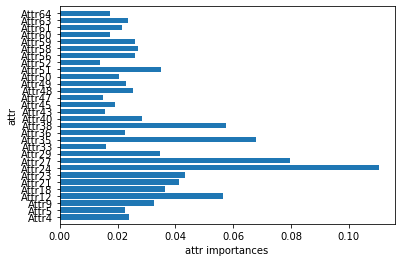

In [10]:
def plot_feature_importances(model): 
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(X.columns))
    plt.xlabel('attr importances')
    plt.ylabel('attr')
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances(modelOpt)

In [11]:
from joblib import dump, load
file_name = 'forest_02.pkl'
dump(modelOpt, file_name)

['forest_02.pkl']